In [1]:
import numpy as np
import math
import collections.abc
from MLP import MLP
import matplotlib.pyplot as plt

###  Train an MLP with 2 inputs, 3-4+ hidden units and one output on the following examples (XOR function):
* ((0, 0), 0)
* ((0, 1), 1)
* ((1, 0), 1)
* ((1, 1), 0)

In [2]:
# **XOR function dataset**
input_dataset=np.array([[0,0],[0,1],[1,0],[1,1]])
target_dataset=np.asarray([0,1,1,0])
input_train , input_test =input_dataset, input_dataset
target_train,target_test =target_dataset, target_dataset

##### Training with 3 hidden unit

weights @ start, input->hidden : [[0.27440675 0.35759468]
 [0.30138169 0.27244159]
 [0.2118274  0.32294706]]
weights@ start, hidden->output : [[0.21879361 0.4458865  0.48183138]]
epoch:0 cost:0.7129
epoch:1 cost:0.7096
epoch:2 cost:0.7070
weights after training, input->hidden : [[0.26497076 0.34804838]
 [0.28166444 0.25249382]
 [0.1904631  0.30133297]]
weights after training, hidden->output : [[0.19072917 0.42113973 0.4589217 ]]


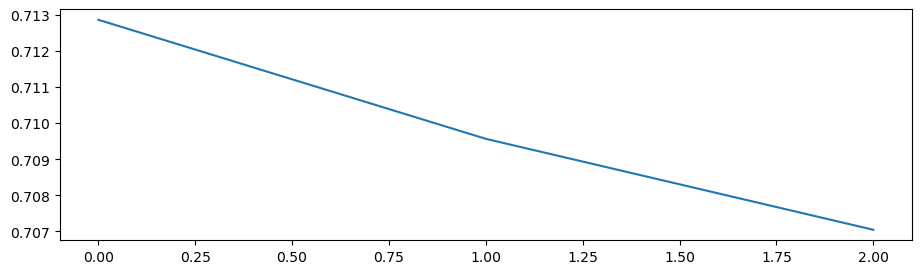

In [3]:
# Seed the random number generator, so we get the same random numbers each time
np.random.seed(0)
epochs=3
learning_rate=.05
num_inputs=2
num_hidden= 3
num_output=1
paramlist=[epochs,learning_rate,num_inputs,num_hidden,num_output]
XOR_MLP_3=MLP(input_train,target_train, paramlist,task="classification")
XOR_MLP_3.train()

##### Training with 4 hidden unit

weights @ start, input->hidden : [[0.27440675 0.35759468]
 [0.30138169 0.27244159]
 [0.2118274  0.32294706]
 [0.21879361 0.4458865 ]]
weights@ start, hidden->output : [[0.48183138 0.19172076 0.39586252 0.26444746]]
epoch:0 cost:0.7230
epoch:1 cost:0.7139
weights after training, input->hidden : [[0.24513096 0.32754993]
 [0.29004609 0.26080829]
 [0.1877907  0.29827901]
 [0.20303782 0.42971691]]
weights after training, hidden->output : [[0.44401674 0.15646382 0.36378349 0.22356958]]


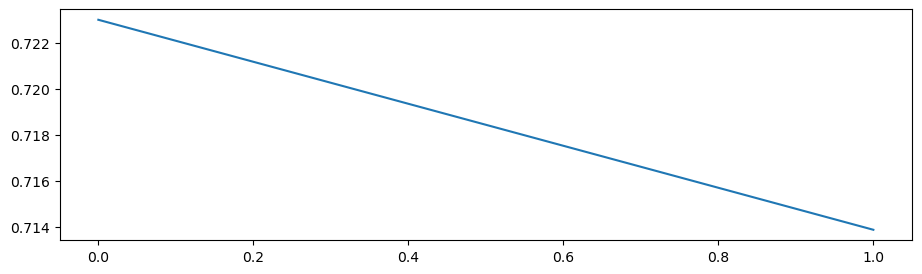

In [4]:
# Seed the random number generator, so we get the same random numbers each time
np.random.seed(0)
epochs=2
learning_rate=.1
num_inputs=2
num_hidden= 4
num_output=1
paramlist=[epochs,learning_rate,num_inputs,num_hidden,num_output]
XOR_MLP_4=MLP(input_train,target_train, paramlist,task="classification")
XOR_MLP_4.train()

### 2. At the end of training, check if the MLP predicts correctly all the examples

##### Testing with 3 hidden unit

In [5]:
XOR_MLP_3.xor_test(input_test,target_test)

counter: 4
activation: 1
target: 0
Correct: 3/4 (75.000000%)


In [6]:
#trying with alternative weights
XOR_MLP_3_v2=[]
for i in range(5):
    np.random.seed(i)
    epochs=2
    learning_rate=.1
    num_inputs=2
    num_hidden= 3
    num_output=1
    paramlist=[epochs,learning_rate,num_inputs,num_hidden,num_output]
    XOR_MLP_3_v2.append(MLP(input_train,target_train, paramlist,task="classification",mute=True))
for model in XOR_MLP_3_v2:
    model.train()
    model.xor_test(input_test,target_test)

Correct: 3/4 (75.000000%)
Correct: 2/4 (50.000000%)
Correct: 2/4 (50.000000%)
Correct: 2/4 (50.000000%)
Correct: 2/4 (50.000000%)


Initial weights are important seems like weights of random seed 0 give best weights. Now I will try with different epoch and learning rates using weights at random seed 0

In [7]:
epochs_list=[2,10,50]
learning_rates_list=[0.3,0.1,0.05,0.01,0.005]
XOR_MLP_3_v3=[]
for epoch in epochs_list:
    for learning_rate in learning_rates_list:
        np.random.seed(0)
        epochs=epoch
        print("epochs:",epochs)
        learning_rates=learning_rate
        print("learning_rates:",learning_rates)
        num_inputs=2
        num_hidden= 3
        num_output=1
        paramlist=[epochs,learning_rates,num_inputs,num_hidden,num_output]
        XOR_MLP_3_v3.append(MLP(input_train,target_train, paramlist,task="classification",mute=True))
for model in XOR_MLP_3_v3:
    model.train()
    model.xor_test(input_test,target_test)

epochs: 2
learning_rates: 0.3
epochs: 2
learning_rates: 0.1
epochs: 2
learning_rates: 0.05
epochs: 2
learning_rates: 0.01
epochs: 2
learning_rates: 0.005
epochs: 10
learning_rates: 0.3
epochs: 10
learning_rates: 0.1
epochs: 10
learning_rates: 0.05
epochs: 10
learning_rates: 0.01
epochs: 10
learning_rates: 0.005
epochs: 50
learning_rates: 0.3
epochs: 50
learning_rates: 0.1
epochs: 50
learning_rates: 0.05
epochs: 50
learning_rates: 0.01
epochs: 50
learning_rates: 0.005
Correct: 2/4 (50.000000%)
Correct: 3/4 (75.000000%)
Correct: 3/4 (75.000000%)
Correct: 3/4 (75.000000%)
Correct: 3/4 (75.000000%)
Correct: 2/4 (50.000000%)
Correct: 2/4 (50.000000%)
Correct: 1/4 (25.000000%)
Correct: 3/4 (75.000000%)
Correct: 3/4 (75.000000%)
Correct: 2/4 (50.000000%)
Correct: 2/4 (50.000000%)
Correct: 2/4 (50.000000%)
Correct: 1/4 (25.000000%)
Correct: 3/4 (75.000000%)


##### Testing with 4 hidden unit

In [8]:
XOR_MLP_4.xor_test(input_test,target_test)

counter: 4
activation: 1
target: 0
Correct: 3/4 (75.000000%)


In [9]:
epochs_list=[2,10,50]
learning_rates_list=[0.3,0.1,0.05,0.01,0.005]
XOR_MLP_4_v3=[]
for epoch in epochs_list:
    for learning_rate in learning_rates_list:
        np.random.seed(0)
        epochs=epoch
        print("epochs:",epochs)
        learning_rates=learning_rate
        print("learning_rates:",learning_rates)
        num_inputs=2
        num_hidden= 4
        num_output=1
        paramlist=[epochs,learning_rates,num_inputs,num_hidden,num_output]
        XOR_MLP_4_v3.append(MLP(input_train,target_train, paramlist,task="classification",mute=True))
for model in XOR_MLP_4_v3:
    model.train()
    model.xor_test(input_test,target_test)

epochs: 2
learning_rates: 0.3
epochs: 2
learning_rates: 0.1
epochs: 2
learning_rates: 0.05
epochs: 2
learning_rates: 0.01
epochs: 2
learning_rates: 0.005
epochs: 10
learning_rates: 0.3
epochs: 10
learning_rates: 0.1
epochs: 10
learning_rates: 0.05
epochs: 10
learning_rates: 0.01
epochs: 10
learning_rates: 0.005
epochs: 50
learning_rates: 0.3
epochs: 50
learning_rates: 0.1
epochs: 50
learning_rates: 0.05
epochs: 50
learning_rates: 0.01
epochs: 50
learning_rates: 0.005
Correct: 1/4 (25.000000%)
Correct: 3/4 (75.000000%)
Correct: 3/4 (75.000000%)
Correct: 3/4 (75.000000%)
Correct: 3/4 (75.000000%)
Correct: 2/4 (50.000000%)
Correct: 2/4 (50.000000%)
Correct: 1/4 (25.000000%)
Correct: 3/4 (75.000000%)
Correct: 3/4 (75.000000%)
Correct: 2/4 (50.000000%)
Correct: 2/4 (50.000000%)
Correct: 2/4 (50.000000%)
Correct: 1/4 (25.000000%)
Correct: 3/4 (75.000000%)


##### Testing with 2 hidden unit & using threshold activation function for hidden units

Note this is just for seeing how it behave. Since derivative of step function is 0 everywhere except for p = 0 where the derivative become infinite. Therefore with 0 derivative every where gradient descent can't adjust weights so it is not useful for this neural network which relies on back propogation but implemented to observe what happens. And also to solve XOR problem and prove that network is able to capture non linearity.

weights @ start, input->hidden : [[1 1]
 [1 1]]
weights@ start, hidden->output : [[ 1 -1]]
epoch:0 cost:0.2500
epoch:1 cost:1.2500
epoch:2 cost:1.1525
epoch:3 cost:1.0690
epoch:4 cost:0.9974
epoch:5 cost:0.9357
epoch:6 cost:0.8824
epoch:7 cost:0.8363
epoch:8 cost:0.7963
epoch:9 cost:0.7616
epoch:10 cost:0.7312
epoch:11 cost:0.7047
epoch:12 cost:0.6815
epoch:13 cost:0.6612
epoch:14 cost:0.6432
epoch:15 cost:0.6275
epoch:16 cost:0.6135
epoch:17 cost:0.6012
epoch:18 cost:0.5903
epoch:19 cost:0.5807
epoch:20 cost:0.5721
epoch:21 cost:0.5645
epoch:22 cost:0.5577
epoch:23 cost:0.5517
epoch:24 cost:0.5463
epoch:25 cost:0.5415
epoch:26 cost:0.5372
epoch:27 cost:0.5333
epoch:28 cost:0.5299
epoch:29 cost:0.5269
epoch:30 cost:0.5241
epoch:31 cost:0.5216
epoch:32 cost:0.5194
epoch:33 cost:0.5175
epoch:34 cost:0.5157
epoch:35 cost:0.5141
epoch:36 cost:0.5127
epoch:37 cost:0.5114
epoch:38 cost:0.5102
epoch:39 cost:0.5092
epoch:40 cost:0.5083
epoch:41 cost:0.5074
epoch:42 cost:0.5067
epoch:43 cost:0.

epoch:484 cost:0.5000
epoch:485 cost:0.5000
epoch:486 cost:0.5000
epoch:487 cost:0.5000
epoch:488 cost:0.5000
epoch:489 cost:0.5000
epoch:490 cost:0.5000
epoch:491 cost:0.5000
epoch:492 cost:0.5000
epoch:493 cost:0.5000
epoch:494 cost:0.5000
epoch:495 cost:0.5000
epoch:496 cost:0.5000
epoch:497 cost:0.5000
epoch:498 cost:0.5000
epoch:499 cost:0.5000
epoch:500 cost:0.5000
epoch:501 cost:0.5000
epoch:502 cost:0.5000
epoch:503 cost:0.5000
epoch:504 cost:0.5000
epoch:505 cost:0.5000
epoch:506 cost:0.5000
epoch:507 cost:0.5000
epoch:508 cost:0.5000
epoch:509 cost:0.5000
epoch:510 cost:0.5000
epoch:511 cost:0.5000
epoch:512 cost:0.5000
epoch:513 cost:0.5000
epoch:514 cost:0.5000
epoch:515 cost:0.5000
epoch:516 cost:0.5000
epoch:517 cost:0.5000
epoch:518 cost:0.5000
epoch:519 cost:0.5000
epoch:520 cost:0.5000
epoch:521 cost:0.5000
epoch:522 cost:0.5000
epoch:523 cost:0.5000
epoch:524 cost:0.5000
epoch:525 cost:0.5000
epoch:526 cost:0.5000
epoch:527 cost:0.5000
epoch:528 cost:0.5000
epoch:529 

epoch:926 cost:0.5000
epoch:927 cost:0.5000
epoch:928 cost:0.5000
epoch:929 cost:0.5000
epoch:930 cost:0.5000
epoch:931 cost:0.5000
epoch:932 cost:0.5000
epoch:933 cost:0.5000
epoch:934 cost:0.5000
epoch:935 cost:0.5000
epoch:936 cost:0.5000
epoch:937 cost:0.5000
epoch:938 cost:0.5000
epoch:939 cost:0.5000
epoch:940 cost:0.5000
epoch:941 cost:0.5000
epoch:942 cost:0.5000
epoch:943 cost:0.5000
epoch:944 cost:0.5000
epoch:945 cost:0.5000
epoch:946 cost:0.5000
epoch:947 cost:0.5000
epoch:948 cost:0.5000
epoch:949 cost:0.5000
epoch:950 cost:0.5000
epoch:951 cost:0.5000
epoch:952 cost:0.5000
epoch:953 cost:0.5000
epoch:954 cost:0.5000
epoch:955 cost:0.5000
epoch:956 cost:0.5000
epoch:957 cost:0.5000
epoch:958 cost:0.5000
epoch:959 cost:0.5000
epoch:960 cost:0.5000
epoch:961 cost:0.5000
epoch:962 cost:0.5000
epoch:963 cost:0.5000
epoch:964 cost:0.5000
epoch:965 cost:0.5000
epoch:966 cost:0.5000
epoch:967 cost:0.5000
epoch:968 cost:0.5000
epoch:969 cost:0.5000
epoch:970 cost:0.5000
epoch:971 

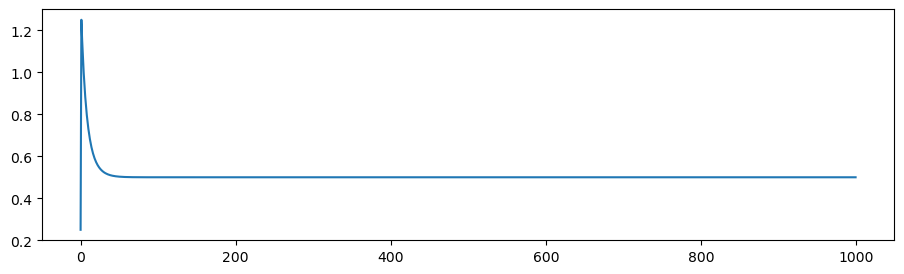

In [10]:
# Seed the random number generator, so we get the same random numbers each time
weight_input_hidden_array=np.array([[1,1],[1,1]])
weight_hidden_output_array=np.array([[1,-1]])
bias_input_hidden_array=np.array([-0.5,-1.5])
bias_hidden_output_array=np.array([-0.5])
weights=[weight_input_hidden_array, weight_hidden_output_array]
biases=[bias_input_hidden_array,bias_hidden_output_array]
epochs=1000
learning_rate=.1
num_inputs=2
num_hidden= 2
num_output=1
paramlist=[epochs,learning_rate,num_inputs,num_hidden,num_output]
XOR_MLP_2=MLP(input_train,target_train, paramlist,hidden_activation="binaryStep", weights=weights,biases=biases)
XOR_MLP_2.train()

In [11]:
XOR_MLP_2.xor_test(input_test,target_test)

counter: 2
activation: 0
target: 1
counter: 3
activation: 0
target: 1
Correct: 2/4 (50.000000%)


weights @ start, input->hidden : [[1 1]
 [1 1]]
weights@ start, hidden->output : [[ 1 -1]]
weights after training, input->hidden : [[1 1]
 [1 1]]
weights after training, hidden->output : [[ 1 -1]]


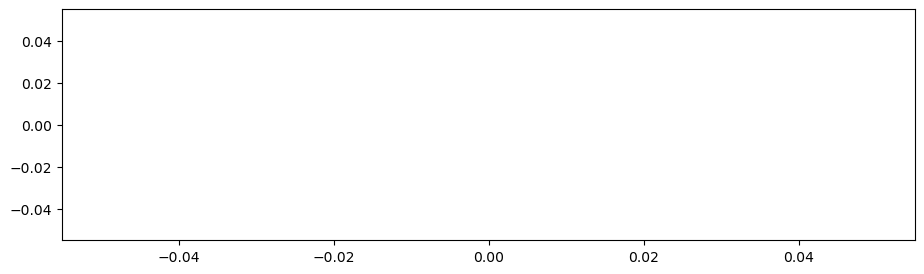

In [12]:
# Seed the random number generator, so we get the same random numbers each time
weight_input_hidden_array=np.array([[1,1],[1,1]])
weight_hidden_output_array=np.array([[1,-1]])
bias_input_hidden_array=np.array([-0.5,-1.5])
bias_hidden_output_array=np.array([-0.5])
weights=[weight_input_hidden_array, weight_hidden_output_array]
biases=[bias_input_hidden_array,bias_hidden_output_array]
epochs=0
learning_rate=.1
num_inputs=2
num_hidden= 2
num_output=1
paramlist=[epochs,learning_rate,num_inputs,num_hidden,num_output]
XOR_MLP_2=MLP(input_train,target_train, paramlist,hidden_activation="binaryStep", weights=weights,biases=biases)
XOR_MLP_2.train()

In [13]:
XOR_MLP_2.xor_test(input_test,target_test)

Correct: 4/4 (100.000000%)


In [14]:
import pickle
filename= 'XOR_MLP_2.pkl'
with open(filename, 'wb') as handle:
    pickle.dump(XOR_MLP_2, handle, pickle.HIGHEST_PROTOCOL)